This notebook contains some plots inside the paper, but is based on the plots I used for the Ellogon presentation.

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import json

# set paletter with colors from sns.color_palette("colorblind")
colors = ["#CC78BC", "#ECE133", "#56B4E9"]
sns.set_palette(sns.color_palette(colors))

In [10]:
sns.color_palette()

[(0.8, 0.47058823529411764, 0.7372549019607844),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [11]:
# sns.set_palette("colorblind")
sns.set_style("ticks")

In [12]:
mpl.rcParams['axes.titlesize'] = 15

In [84]:
def make_plot(data, dataset, legend_loc):
    min_y = rand_init_and_finetune_results["Accuracy"].min()
    
    hue_col = 'Model'
    g = sns.catplot(x='Method', y='Accuracy',hue=hue_col, data=data,
            height=6, aspect=9/6, kind="bar",legend=False, hue_order=["Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant"])
   
    #add legend to plot
    plt.legend(loc=legend_loc,title=hue_col, fontsize="large", title_fontsize="large", framealpha=1.) 
    plt.xlabel("")
    plt.ylim([min_y-5, 100])
    plt.title(f"Test accuracy for random initialization and finetuning on {dataset}")
    for i, p in enumerate(g.ax.patches):
        if i != 0:
            std = rand_init_and_finetune_results.loc[i-1,"Standard deviation"]
            g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), f"{p.get_height()} $\pm$ {std}", 
            fontsize=10, ha='center', va='bottom')
    os.makedirs("plots", exist_ok=True)
    plt.savefig(f"plots/acc_rand_fine_{dataset.lower()}.jpg",dpi=500, bbox_inches = 'tight')
    plt.show()

In [85]:
linear_log_dirs = [["/home/b.dolicki/logs/benchmark/linear/linear_bach_no_rot_aug/15280", "BACH"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_bach/15277", "BACH"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_bach_e2/15325", "BACH"],
                    ["/home/b.dolicki/logs/benchmark/linear/10perc/linear_bach_10perc/15283", "BACH"],
                    ["/home/b.dolicki/logs/benchmark/linear/10perc/linear_bach_e2_10perc/15329", "BACH"],
                    ["/home/b.dolicki/logs/benchmark/linear/1perc/linear_bach_1perc/15284", "BACH"],
                    ["/home/b.dolicki/logs/benchmark/linear/1perc/linear_bach_e2_1perc/15330", "BACH"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_breakhis_moco/14630", "BreaKHis"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_breakhis_moco_no_rot_aug/14635", "BreaKHis"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_breakhis_moco_e2/14681", "BreaKHis"],
                    ["/home/b.dolicki/logs/benchmark/linear/10perc/linear_breakhis_10perc/15075", "BreaKHis"],
                    ["/home/b.dolicki/logs/benchmark/linear/10perc/linear_breakhis_e2_10perc/15125", "BreaKHis"],
                    ["/home/b.dolicki/logs/benchmark/linear/1perc/linear_breakhis_1perc/14870", "BreaKHis"],
                    ["/home/b.dolicki/logs/benchmark/linear/1perc/linear_breakhis_moco_e2_1perc/14986", "BreaKHis"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_nct_moco_no_rot_aug/15009", "NCT"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_nct/15007", "NCT"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_nct_moco_e2/15010", "NCT"],
                    ["/home/b.dolicki/logs/benchmark/linear/10perc/linear_nct_10perc/15210", "NCT"],
                    ["/home/b.dolicki/logs/benchmark/linear/10perc/linear_nct_e2_10perc/15173", "NCT"],
                    ["/home/b.dolicki/logs/benchmark/linear/1perc/linear_nct_1perc/15073", "NCT"],
                    ["/home/b.dolicki/logs/benchmark/linear/1perc/linear_nct_e2_1perc/15208", "NCT"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_pcam_moco_no_rot_aug/14762", "PCam"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_pcam_moco/14688", "PCam"],
                    ["/home/b.dolicki/logs/benchmark/linear/linear_pcam_moco_e2/14739", "PCam"],
                    ["/home/b.dolicki/logs/benchmark/linear/10perc/linear_pcam_10perc/15171", "PCam"],
                    ["/home/b.dolicki/logs/benchmark/linear/10perc/linear_pcam_moco_e2_10perc/15209", "PCam"],
                    ["/home/b.dolicki/logs/benchmark/linear/1perc/linear_pcam_1perc/14872", "PCam"],
                    ["/home/b.dolicki/logs/benchmark/linear/1perc/linear_pcam_moco_e2_1perc/14985", "PCam"]]

In [86]:
rand_init_finetune_log_dirs = [["/home/b.dolicki/logs/supervised/bach/15271", "BACH"],
                                ["/home/b.dolicki/logs/supervised/bach_e2/15324", "BACH"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_bach_no_rot_aug/15247", "BACH"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_bach/15246", "BACH"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_bach_e2/15323", "BACH"],
                                ["/home/b.dolicki/logs/supervised/breakhis/14455", "BreaKHis"],
                                ["/home/b.dolicki/logs/supervised/breakhis_e2/14459", "BreaKHis"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_breakhis_moco_no_rot_aug/14510", "BreaKHis"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_breakhis_moco/14511", "BreaKHis"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_breakhis_e2_moco/14683", "BreaKHis"],
                                ["/home/b.dolicki/logs/supervised/nct/14526", "NCT"],
                                ["/home/b.dolicki/logs/supervised/nct_e2/14528", "NCT"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_nct_no_rot_aug/14975", "NCT"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_nct/14976", "NCT"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_nct_e2_moco/14991", "NCT"],
                                ["/home/b.dolicki/logs/supervised/pcam/avg_12932_14447_14448.json", "PCam"],
                                ["/home/b.dolicki/logs/supervised/pcam_e2/avg_14067_14449_14450.json", "PCam"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_pcam_moco_no_rot_aug/avg_14363_14415_14439.json", "PCam"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_pcam_moco/avg_14244_14301_14414.json", "PCam"],
                                ["/home/b.dolicki/logs/benchmark/finetune/finetune_pcam_e2_moco/avg_14364_14416_14421.json", "PCam"]
                                ]

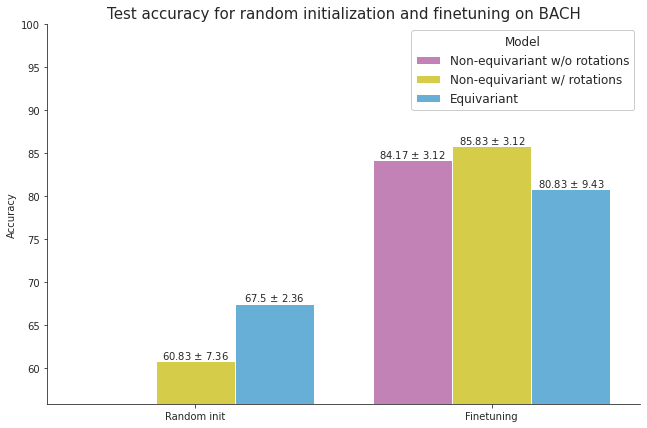

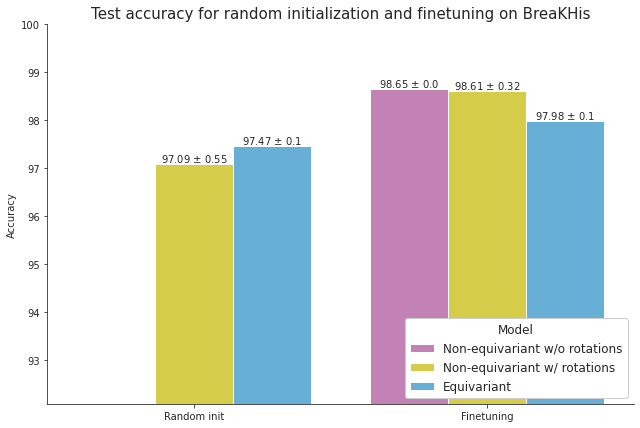

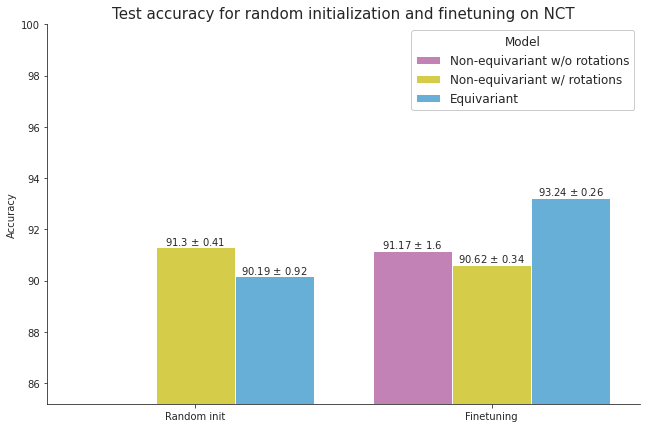

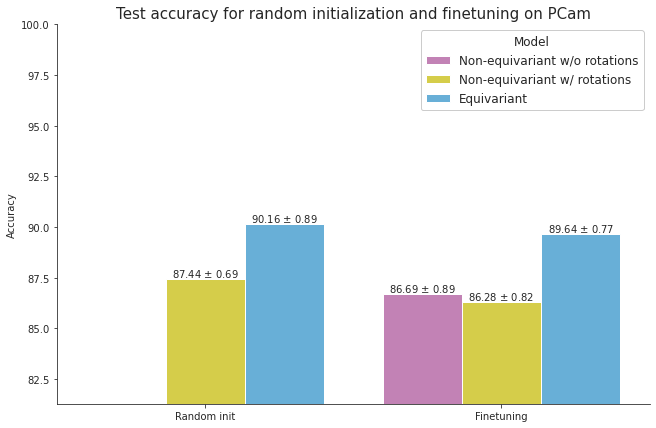

In [88]:

metric = "acc"
last_dataset = "BACH"
rand_init_and_finetune_results={"Method": ["Random init", "Random init", "Finetuning", "Finetuning", "Finetuning"], 
                                "Model": ["Non-equivariant w/ rotations", "Equivariant", "Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant"], 
                                "Accuracy": [],
                                "Standard deviation":[]}
for log_dir, dataset in rand_init_finetune_log_dirs:
    if dataset != last_dataset:
        rand_init_and_finetune_results = pd.DataFrame(rand_init_and_finetune_results)
        make_plot(rand_init_and_finetune_results, last_dataset, "upper right" if last_dataset != "BreaKHis" else "lower right")
        rand_init_and_finetune_results={"Method": ["Random init", "Random init", "Finetuning", "Finetuning", "Finetuning"], 
                                        "Model": ["Non-equivariant w/ rotations", "Equivariant", "Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant"], 
                                        "Accuracy": [],
                                        "Standard deviation":[]}
        
    if "json" in log_dir:
        with open(log_dir) as json_file:
            avg_results = json.load(json_file)
    else:
        with open(os.path.join(log_dir, "avg_seed_all_results.json")) as json_file:
            avg_results = json.load(json_file)
    
    rand_init_and_finetune_results["Accuracy"].append(np.round(avg_results["test"]["avg_"+metric],2))
    rand_init_and_finetune_results["Standard deviation"].append(np.round(avg_results["test"]["std_"+metric], 2))
    last_dataset = dataset
    
rand_init_and_finetune_results = pd.DataFrame(rand_init_and_finetune_results)
make_plot(rand_init_and_finetune_results, last_dataset, "upper right")
        
    
    

In [56]:
breakhis_results={"Method": ["Random init", "Random init", "Finetuning", "Finetuning", "Finetuning"], 
              "Model": ["Non-equivariant w/ rotations", "Equivariant", "Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant"], 
              "Accuracy": [97.09, 97.47, 98.65, 98.60, 97.97]}
breakhis_results = pd.DataFrame(breakhis_results)
breakhis_results

,Method,Model,Accuracy
0,Random init,Non-equivariant w/ rotations,97.09
1,Random init,Equivariant,97.47
2,Finetuning,Non-equivariant w/o rotations,98.65
3,Finetuning,Non-equivariant w/ rotations,98.60
4,Finetuning,Equivariant,97.97


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


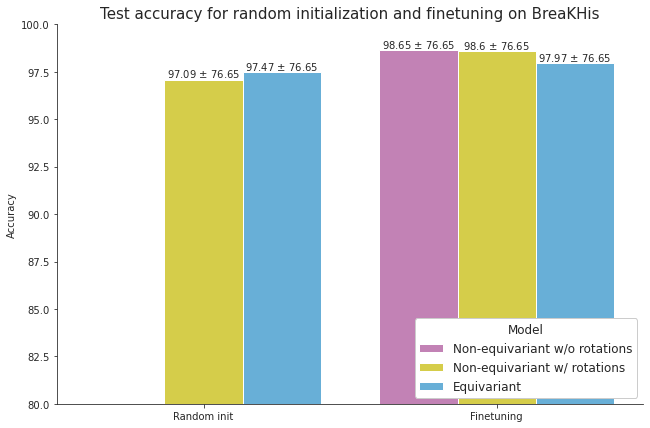

In [57]:
make_plot(breakhis_results, "BreaKHis", "lower right")

## Linear evaluation

In [58]:
import json

def plot_linear_eval(runs, dataset, ylim):
    train_acc = {}
    valid_acc = {}
    for run in runs:
        metrics= {"train": [], "valid": []}
        with open(run["run_file"]+".json") as json_file:
            phase_metrics = list(json_file)
            for train_phase_idx in range(0, len(phase_metrics), 2):
                epoch = int(train_phase_idx / 2)
                valid_phase_idx = train_phase_idx + 1

                train_epoch_acc = json.loads(phase_metrics[train_phase_idx])["train_accuracy_list_meter"]["top_1"]["0"]
                valid_epoch_acc = json.loads(phase_metrics[valid_phase_idx])["test_accuracy_list_meter"]["top_1"]["0"]
                metrics["train"].append(train_epoch_acc)
                metrics["valid"].append(valid_epoch_acc)
            train_acc[run["label"]] = metrics["train"]
            valid_acc[run["label"]] = metrics["valid"]
    
    
    # train acc
    train_acc = pd.DataFrame(train_acc)
    mpl.rcParams['figure.figsize'] = 12,8

    sns.lineplot(data=train_acc, dashes=False)
    plt.ylim((ylim[0], ylim[1]))
    plt.title(f"Train accuracy over epochs for {dataset}")
    colors = sns.color_palette()

    plt.legend(title='Models', fontsize="large", title_fontsize="large", framealpha=1.)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")

    plt.savefig(f"plots/train_accs_{dataset.lower()}.jpg",dpi=500, bbox_inches = 'tight')
    plt.show()


    # validation and test acc
    valid_acc = pd.DataFrame(valid_acc)
    g = sns.lineplot(data=valid_acc, dashes=False)
    plt.ylim((ylim[2], ylim[3]))
    plt.title(f"Validation accuracy over epochs and final test accuracy for {dataset}")
    colors = sns.color_palette()

    for i, run in enumerate(runs):
        plt.scatter(run["best_valid_epoch"], valid_acc[run["label"]].values[run["best_valid_epoch"]], 
                    marker='v', s=50, label=f"Best validation accuracy {run['label']}", color=colors[i])
        plt.scatter(run["best_valid_epoch"], run["test_acc"], marker='o', s=50, label=f"Test accuracy {run['label']}", color=colors[i])

    plt.legend(title='Models', fontsize="large", title_fontsize="large", framealpha=1.)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")

    plt.savefig(f"plots/val_test_accs_{dataset.lower()}.jpg",dpi=500, bbox_inches = 'tight')

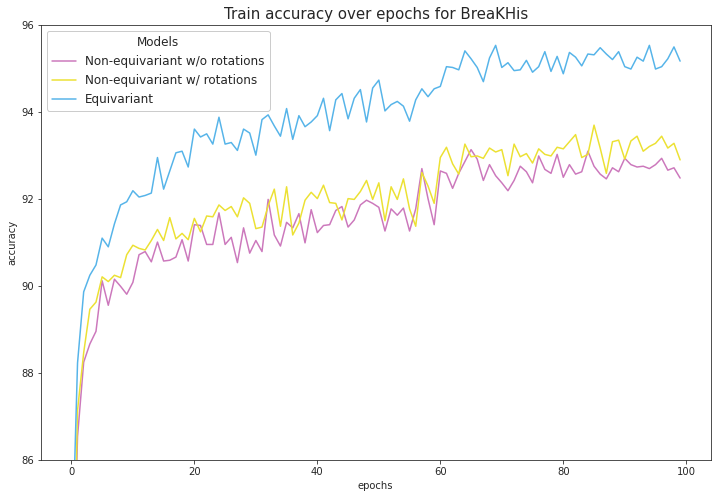

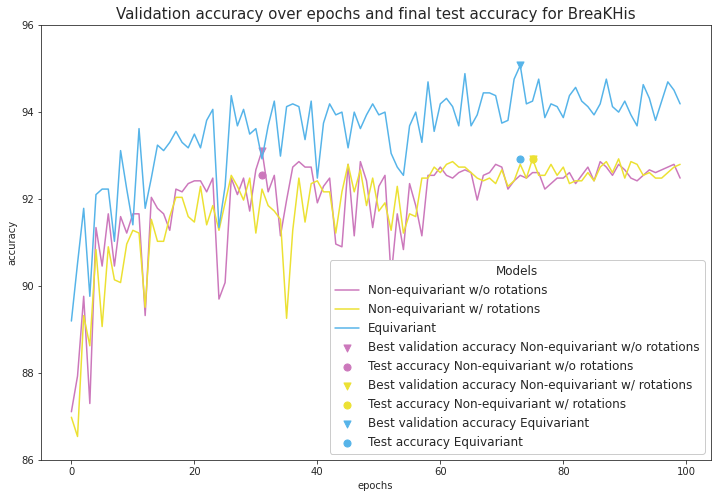

In [59]:
runs = [{"run_file":"metrics/metrics_14635_seed_7",
         "best_valid_epoch": 31,
         "test_acc":92.54,
         "label":"Non-equivariant w/o rotations"},
        {"run_file":"metrics/metrics_14630_seed_7",
         "best_valid_epoch": 75,
         "test_acc":92.92,
         "label":"Non-equivariant w/ rotations"},
        {"run_file":"metrics/metrics_14681_seed_7",
         "best_valid_epoch": 73,
         "test_acc":92.92,
         "label":"Equivariant"}]
dataset= "BreaKHis"

plot_linear_eval(runs, "BreaKHis", ylim=[86, 96, 86, 96])

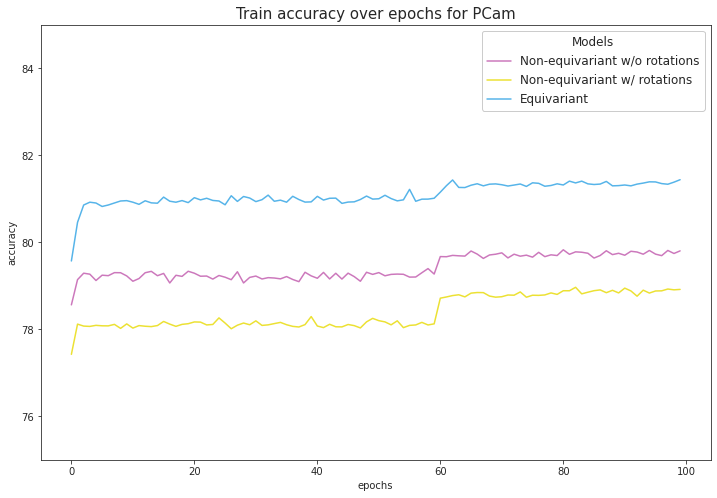

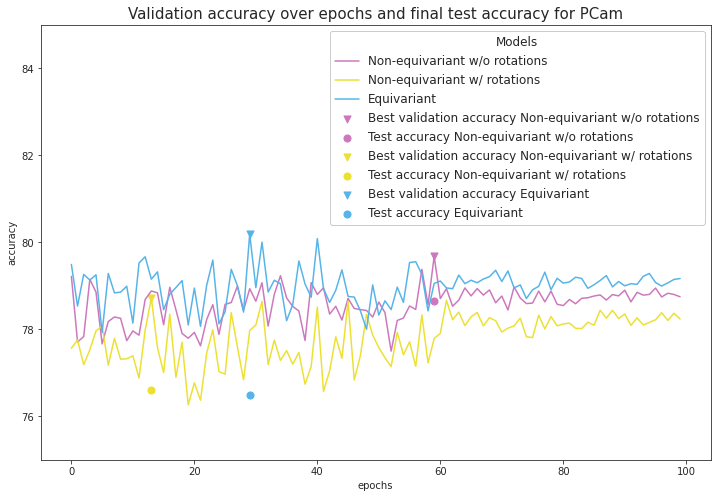

In [60]:
runs = [{"run_file":"metrics/metrics_14762_seed_7",
         "best_valid_epoch": 59,
         "test_acc":78.65,
         "label":"Non-equivariant w/o rotations"},
        {"run_file":"metrics/metrics_14688_seed_7",
         "best_valid_epoch": 13,
         "test_acc":76.61,
         "label":"Non-equivariant w/ rotations"},
        {"run_file":"metrics/metrics_14739_seed_7",
         "best_valid_epoch": 29,
         "test_acc":76.49,
         "label":"Equivariant"}]
dataset= "PCam"

plot_linear_eval(runs, "PCam", ylim=[75, 85, 75, 85])

## Linear summary

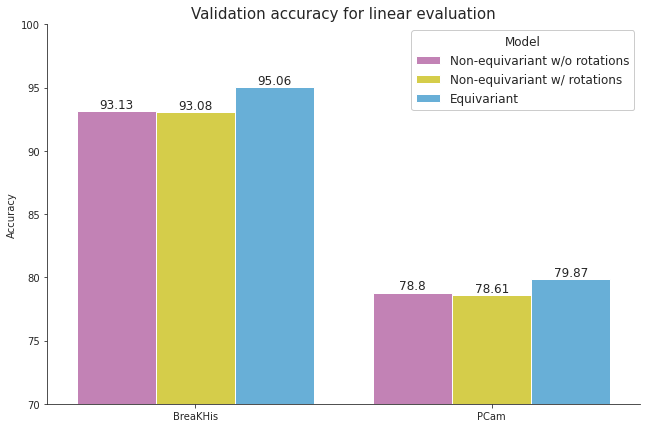

In [61]:
val_results={"Dataset": ["BreaKHis", "BreaKHis", "BreaKHis", 
                     "PCam", "PCam", "PCam"], 
              "Model": ["Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant",
                        "Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant"], 
              "Accuracy": [93.13, 93.08, 95.06,
                          78.8, 78.61, 79.87]}
test_results={"Dataset": ["BreaKHis", "BreaKHis", "BreaKHis", 
                     "PCam", "PCam", "PCam"], 
              "Model": ["Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant",
                        "Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant"], 
              "Accuracy": [92.54, 93.17, 92.92,
                          77.81, 77.1, 76.41]}
data = pd.DataFrame(val_results)
 
hue_col = 'Model'
g = sns.catplot(x='Dataset', y='Accuracy',hue=hue_col, data=data,
        height=6, aspect=9/6, kind="bar",legend=False, hue_order=["Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant"])

#add legend to plot
plt.legend(title=hue_col, fontsize="large", title_fontsize="large", framealpha=1.) 
plt.xlabel("")
plt.ylim([70, 100])
plt.title(f"Validation accuracy for linear evaluation")
for p in g.ax.patches:
#         p.set_width(0.2)
    g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), str(p.get_height()), 
    fontsize=12, ha='center', va='bottom')
os.makedirs("plots", exist_ok=True)
plt.savefig(f"plots/acc_linear_val.jpg",dpi=500, bbox_inches = 'tight')
plt.show()

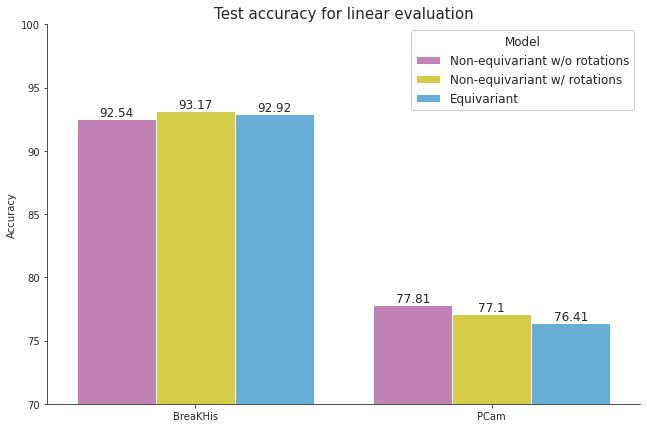

In [62]:
data = pd.DataFrame(test_results)
 
hue_col = 'Model'
g = sns.catplot(x='Dataset', y='Accuracy',hue=hue_col, data=data,
        height=6, aspect=9/6, kind="bar",legend=False, hue_order=["Non-equivariant w/o rotations", "Non-equivariant w/ rotations", "Equivariant"])

#add legend to plot
plt.legend(title=hue_col, fontsize="large", title_fontsize="large", framealpha=1.) 
plt.xlabel("")
plt.ylim([70, 100])
plt.title(f"Test accuracy for linear evaluation")
for p in g.ax.patches:
#         p.set_width(0.2)
    g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), str(p.get_height()), 
    fontsize=12, ha='center', va='bottom')
os.makedirs("plots", exist_ok=True)
plt.savefig(f"plots/acc_linear_test.jpg",dpi=500, bbox_inches = 'tight')
plt.show()

## Downsampled pretraining results

In [63]:

downsampled_results={"Dataset": ["BreaKHis", "BreaKHis", "PCam", "PCam"], 
              "Model": ["Non-equivariant w/ rotations", "Equivariant", "Non-equivariant w/ rotations", "Equivariant"], 
              "Accuracy": [81.24, 83.43, 67.70, 70.34]}
downsampled_results = pd.DataFrame(downsampled_results)
downsampled_results

,Dataset,Model,Accuracy
0,BreaKHis,Non-equivariant w/ rotations,81.24
1,BreaKHis,Equivariant,83.43
2,PCam,Non-equivariant w/ rotations,67.70
3,PCam,Equivariant,70.34


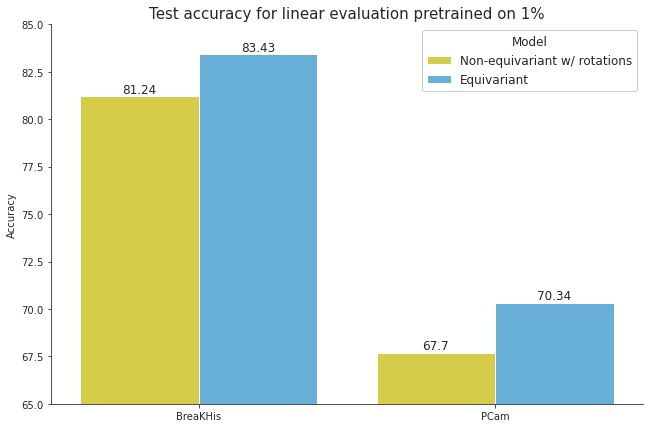

In [64]:
data = downsampled_results

colors = sns.color_palette()
sns.set_palette(colors[1:])
hue_col = 'Model'
g = sns.catplot(x='Dataset', y='Accuracy',hue=hue_col, data=data,
        height=6, aspect=9/6, kind="bar",legend=False, hue_order=["Non-equivariant w/ rotations", "Equivariant"])

#add legend to plot
plt.legend(title=hue_col, fontsize="large", title_fontsize="large", framealpha=1.) 
plt.xlabel("")
plt.ylim([65,85])
plt.title(f"Test accuracy for linear evaluation pretrained on 1%")
for p in g.ax.patches:
#         p.set_width(0.2)
    g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), str(p.get_height()), 
    fontsize=12, ha='center', va='bottom')
os.makedirs("plots", exist_ok=True)
plt.savefig(f"plots/acc_linear_1perc.jpg",dpi=500, bbox_inches = 'tight')
plt.show()